# Data_Cleaning


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#Reading dataset
dataframe = pd.read_csv("enron_data_file_with_poi.csv")
dataframe.drop('Unnamed: 0', inplace=True, axis=1)              ##drop unammed column
dataframe.at[103,:] = 0                                         ## update 'total' row with value zero
df = dataframe.copy()
df['poi_value'] = df['poi']                                     ## moving target value at the end
df.drop('poi', inplace=True, axis=1)

df

,names,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,...,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,email_address,poi_value
0,METTS MARK,365788.0,807.0,0.0,1061827.0,0.0,600000.0,0.0,0.0,585062.0,...,0.0,29.0,1740.0,1.0,0.0,702.0,585062.0,0.0,mark.metts@enron.com,0.0
1,BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,0.0,1200000.0,0.0,-1386055.0,10623258.0,...,6680544.0,0.0,2660303.0,0.0,1586055.0,0.0,3942714.0,0.0,NaN,0.0
2,ELLIOTT STEVEN,170941.0,0.0,0.0,211725.0,0.0,350000.0,0.0,-400729.0,6678735.0,...,4890344.0,0.0,12961.0,0.0,0.0,0.0,1788391.0,0.0,steven.elliott@enron.com,0.0
3,CORDES WILLIAM R,0.0,764.0,0.0,0.0,0.0,0.0,0.0,0.0,1038185.0,...,651850.0,12.0,0.0,0.0,0.0,58.0,386335.0,0.0,bill.cordes@enron.com,0.0
4,HANNON KEVIN P,243293.0,1045.0,0.0,288682.0,0.0,1500000.0,0.0,-3117011.0,6391065.0,...,5538001.0,32.0,11350.0,21.0,1617011.0,1035.0,853064.0,0.0,kevin.hannon@enron.com,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,GRAMM WENDY L,0.0,0.0,0.0,119292.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119292.0,NaN,0.0
142,CAUSEY RICHARD A,415189.0,1892.0,0.0,1868758.0,0.0,1000000.0,0.0,-235000.0,2502063.0,...,0.0,49.0,307895.0,12.0,350000.0,1585.0,2502063.0,0.0,richard.causey@enron.com,1.0
143,TAYLOR MITCHELL S,265214.0,533.0,227449.0,1092663.0,0.0,600000.0,0.0,0.0,3745048.0,...,3181250.0,29.0,0.0,0.0,0.0,300.0,563798.0,0.0,mitchell.taylor@enron.com,0.0
144,DONAHUE JR JEFFREY M,278601.0,865.0,0.0,875760.0,0.0,800000.0,0.0,-300000.0,1080988.0,...,765920.0,22.0,891.0,11.0,0.0,772.0,315068.0,0.0,jeff.donahue@enron.com,0.0


In [2]:
df[df['poi_value']==1].names

4            HANNON KEVIN P
16           COLWELL WESLEY
30           RIEKER PAULA H
40         KOPPER MICHAEL J
52               SHELBY REX
59         DELAINEY DAVID W
64            LAY KENNETH L
75       BOWEN JR RAYMOND M
81         BELDEN TIMOTHY N
85          FASTOW ANDREW S
87     CALGER CHRISTOPHER F
88           RICE KENNETH D
95       SKILLING JEFFREY K
124          YEAGER F SCOTT
125            HIRKO JOSEPH
135           KOENIG MARK E
142        CAUSEY RICHARD A
145         GLISAN JR BEN F
Name: names, dtype: object

In [3]:
print(df.dtypes)

names                         object
salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
loan_advances                float64
bonus                        float64
restricted_stock_deferred    float64
deferred_income              float64
total_stock_value            float64
expenses                     float64
from_poi_to_this_person      float64
exercised_stock_options      float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
long_term_incentive          float64
shared_receipt_with_poi      float64
restricted_stock             float64
director_fees                float64
email_address                 object
poi_value                    float64
dtype: object


### names,email_address are not number and also not helpful in predicting the target

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   names                      146 non-null    object 
 1   salary                     146 non-null    float64
 2   to_messages                146 non-null    float64
 3   deferral_payments          146 non-null    float64
 4   total_payments             146 non-null    float64
 5   loan_advances              146 non-null    float64
 6   bonus                      146 non-null    float64
 7   restricted_stock_deferred  146 non-null    float64
 8   deferred_income            146 non-null    float64
 9   total_stock_value          146 non-null    float64
 10  expenses                   146 non-null    float64
 11  from_poi_to_this_person    146 non-null    float64
 12  exercised_stock_options    146 non-null    float64
 13  from_messages              146 non-null    float64

### no Null value

In [5]:
for col in df.columns:
    u_val = len(pd.unique(df[col]))
    print(col,u_val)
    if(u_val<20):
        print(list(pd.unique(df[col])))
        print(df[col].value_counts())


names 146
salary 94
to_messages 87
deferral_payments 39
total_payments 125
loan_advances 4
[0.0, 81525000.0, 400000.0, 2000000.0]
0.0           143
81525000.0      1
400000.0        1
2000000.0       1
Name: loan_advances, dtype: int64
bonus 41
restricted_stock_deferred 18
[0.0, -329825.0, -409554.0, -94556.0, -153686.0, -32460.0, 44093.0, -472568.0, -315068.0, -560222.0, -72419.0, -126027.0, -44093.0, -140264.0, 15456290.0, -307301.0, -1787380.0, -82782.0]
 0.0           129
-472568.0        1
-72419.0         1
-153686.0        1
-560222.0        1
-315068.0        1
-32460.0         1
 15456290.0      1
-140264.0        1
-1787380.0       1
-329825.0        1
-307301.0        1
-44093.0         1
-82782.0         1
 44093.0         1
-94556.0         1
-126027.0        1
-409554.0        1
Name: restricted_stock_deferred, dtype: int64
deferred_income 44
total_stock_value 124
expenses 94
from_poi_to_this_person 57
exercised_stock_options 101
from_messages 65
other 92
from_this_person

In [6]:
df[df['restricted_stock_deferred'] != 0].poi_value


8      0.0
9      0.0
11     0.0
15     0.0
23     0.0
24     0.0
37     0.0
44     0.0
48     0.0
73     0.0
108    0.0
110    0.0
115    0.0
117    0.0
118    0.0
127    0.0
131    0.0
Name: poi_value, dtype: float64

In [7]:
df[df['director_fees'] != 0].poi_value

23     0.0
24     0.0
28     0.0
35     0.0
45     0.0
46     0.0
49     0.0
53     0.0
63     0.0
93     0.0
96     0.0
110    0.0
111    0.0
117    0.0
136    0.0
141    0.0
Name: poi_value, dtype: float64

### 'restricted_stock_deferred' and 'director_fees' are not useful as it's constant in both type of class of target


### some column values are discrete like_loan advances
Loan_advances not helpful as only 3 non zero values in column


In [8]:
df.drop(['names','email_address'],inplace = True, axis =1)
df


,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,poi_value
0,365788.0,807.0,0.0,1061827.0,0.0,600000.0,0.0,0.0,585062.0,94299.0,38.0,0.0,29.0,1740.0,1.0,0.0,702.0,585062.0,0.0,0.0
1,267102.0,0.0,1295738.0,5634343.0,0.0,1200000.0,0.0,-1386055.0,10623258.0,11200.0,0.0,6680544.0,0.0,2660303.0,0.0,1586055.0,0.0,3942714.0,0.0,0.0
2,170941.0,0.0,0.0,211725.0,0.0,350000.0,0.0,-400729.0,6678735.0,78552.0,0.0,4890344.0,0.0,12961.0,0.0,0.0,0.0,1788391.0,0.0,0.0
3,0.0,764.0,0.0,0.0,0.0,0.0,0.0,0.0,1038185.0,0.0,10.0,651850.0,12.0,0.0,0.0,0.0,58.0,386335.0,0.0,0.0
4,243293.0,1045.0,0.0,288682.0,0.0,1500000.0,0.0,-3117011.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,1617011.0,1035.0,853064.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.0,0.0,0.0,119292.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119292.0,0.0
142,415189.0,1892.0,0.0,1868758.0,0.0,1000000.0,0.0,-235000.0,2502063.0,30674.0,58.0,0.0,49.0,307895.0,12.0,350000.0,1585.0,2502063.0,0.0,1.0
143,265214.0,533.0,227449.0,1092663.0,0.0,600000.0,0.0,0.0,3745048.0,0.0,0.0,3181250.0,29.0,0.0,0.0,0.0,300.0,563798.0,0.0,0.0
144,278601.0,865.0,0.0,875760.0,0.0,800000.0,0.0,-300000.0,1080988.0,96268.0,188.0,765920.0,22.0,891.0,11.0,0.0,772.0,315068.0,0.0,0.0


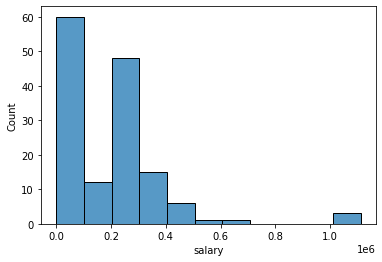

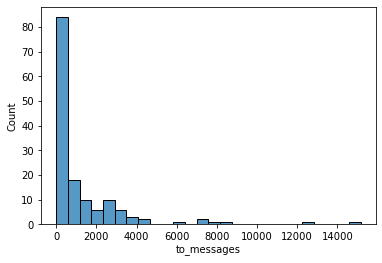

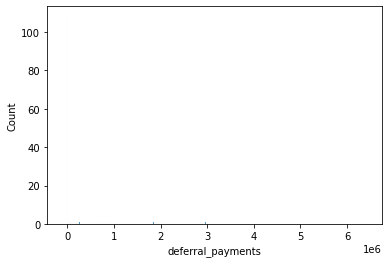

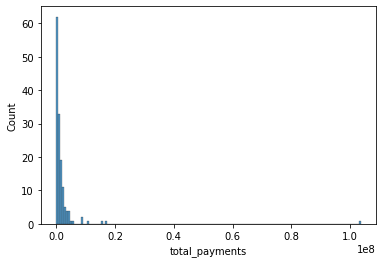

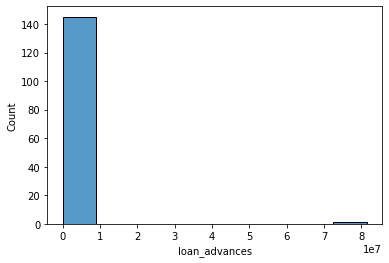

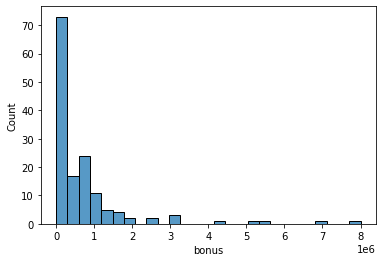

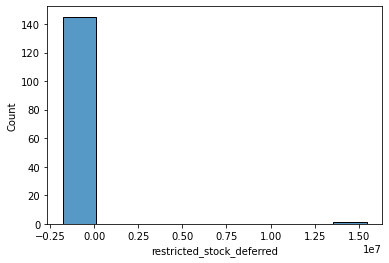

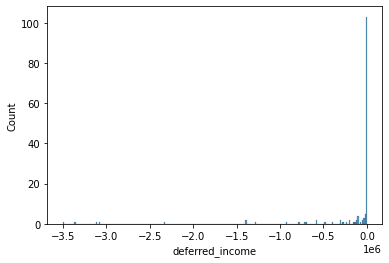

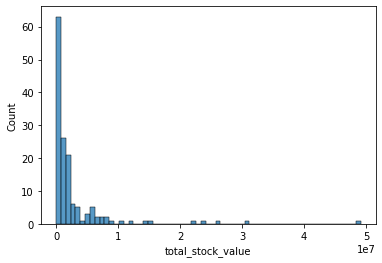

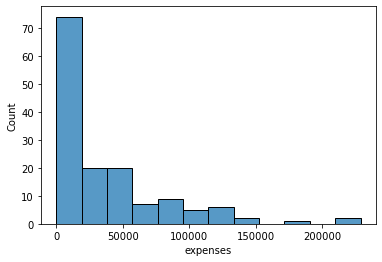

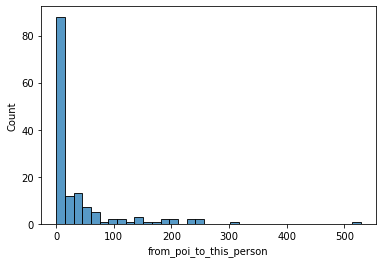

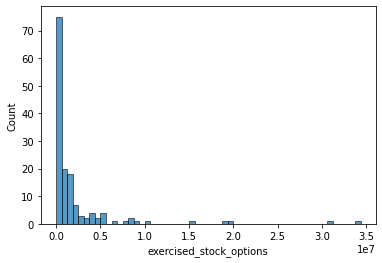

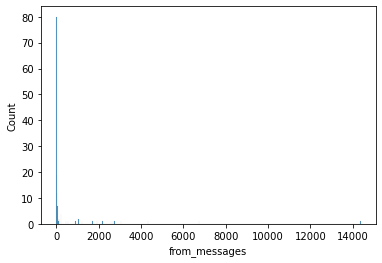

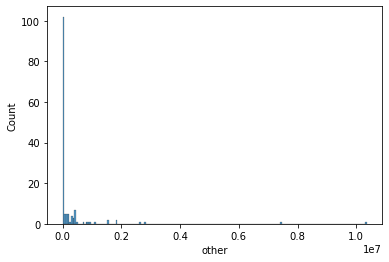

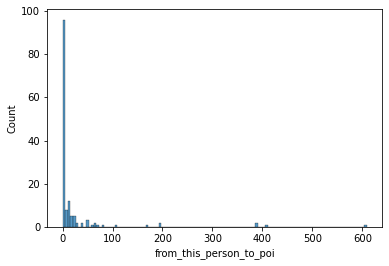

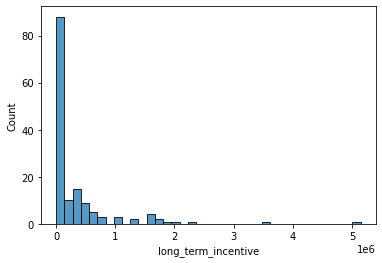

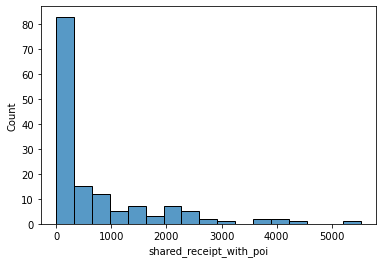

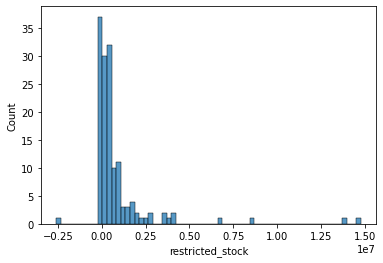

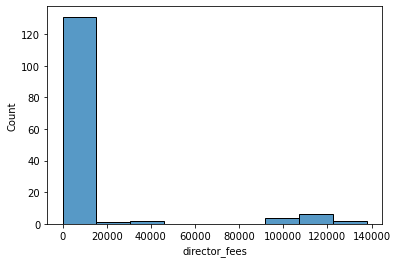

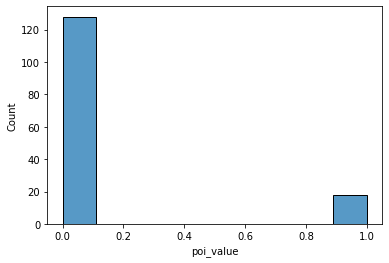

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,poi_value
0,365788.0,807.0,0.0,1061827.0,0.0,600000.0,0.0,0.0,585062.0,94299.0,38.0,0.0,29.0,1740.0,1.0,0.0,702.0,585062.0,0.0,0.0
1,267102.0,0.0,1295738.0,5634343.0,0.0,1200000.0,0.0,-1386055.0,10623258.0,11200.0,0.0,6680544.0,0.0,2660303.0,0.0,1586055.0,0.0,3942714.0,0.0,0.0
2,170941.0,0.0,0.0,211725.0,0.0,350000.0,0.0,-400729.0,6678735.0,78552.0,0.0,4890344.0,0.0,12961.0,0.0,0.0,0.0,1788391.0,0.0,0.0
3,0.0,764.0,0.0,0.0,0.0,0.0,0.0,0.0,1038185.0,0.0,10.0,651850.0,12.0,0.0,0.0,0.0,58.0,386335.0,0.0,0.0
4,243293.0,1045.0,0.0,288682.0,0.0,1500000.0,0.0,-3117011.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,1617011.0,1035.0,853064.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.0,0.0,0.0,119292.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119292.0,0.0
142,415189.0,1892.0,0.0,1868758.0,0.0,1000000.0,0.0,-235000.0,2502063.0,30674.0,58.0,0.0,49.0,307895.0,12.0,350000.0,1585.0,2502063.0,0.0,1.0
143,265214.0,533.0,227449.0,1092663.0,0.0,600000.0,0.0,0.0,3745048.0,0.0,0.0,3181250.0,29.0,0.0,0.0,0.0,300.0,563798.0,0.0,0.0
144,278601.0,865.0,0.0,875760.0,0.0,800000.0,0.0,-300000.0,1080988.0,96268.0,188.0,765920.0,22.0,891.0,11.0,0.0,772.0,315068.0,0.0,0.0


In [9]:
for col in df.columns:
    sns.histplot(df[col]) 
    plt.show()
df

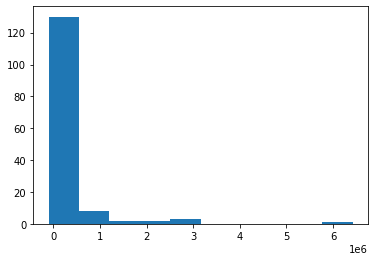

deferral_payments


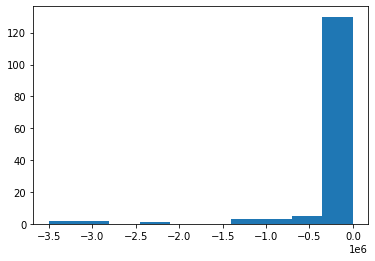

deferred_income


In [10]:
plt.hist(df['deferral_payments'])
plt.show()
print('deferral_payments')
plt.hist(df['deferred_income'])
plt.show()
print('deferred_income')

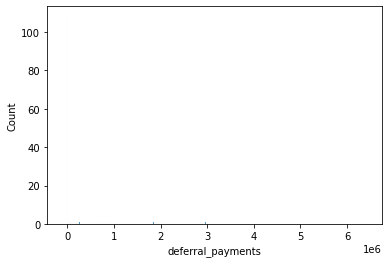

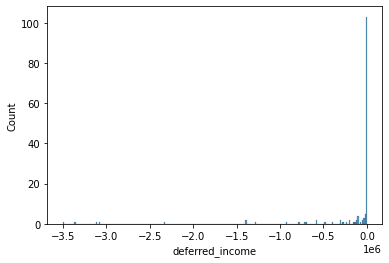

In [11]:
sns.histplot(df['deferral_payments']) 
plt.show()
sns.histplot(df['deferred_income']) 
plt.show()

### hist and sns plots are very different 

### Dropping 'restricted_stock_deferred','director_fees','loan_advances'

In [12]:
df.drop(['restricted_stock_deferred','director_fees','loan_advances'],inplace = True, axis =1)

array([[<AxesSubplot:xlabel='salary', ylabel='salary'>,
        <AxesSubplot:xlabel='to_messages', ylabel='salary'>,
        <AxesSubplot:xlabel='deferral_payments', ylabel='salary'>,
        <AxesSubplot:xlabel='total_payments', ylabel='salary'>,
        <AxesSubplot:xlabel='bonus', ylabel='salary'>,
        <AxesSubplot:xlabel='deferred_income', ylabel='salary'>,
        <AxesSubplot:xlabel='total_stock_value', ylabel='salary'>,
        <AxesSubplot:xlabel='expenses', ylabel='salary'>,
        <AxesSubplot:xlabel='from_poi_to_this_person', ylabel='salary'>,
        <AxesSubplot:xlabel='exercised_stock_options', ylabel='salary'>,
        <AxesSubplot:xlabel='from_messages', ylabel='salary'>,
        <AxesSubplot:xlabel='other', ylabel='salary'>,
        <AxesSubplot:xlabel='from_this_person_to_poi', ylabel='salary'>,
        <AxesSubplot:xlabel='long_term_incentive', ylabel='salary'>,
        <AxesSubplot:xlabel='shared_receipt_with_poi', ylabel='salary'>,
        <AxesSubplot:xlabel=

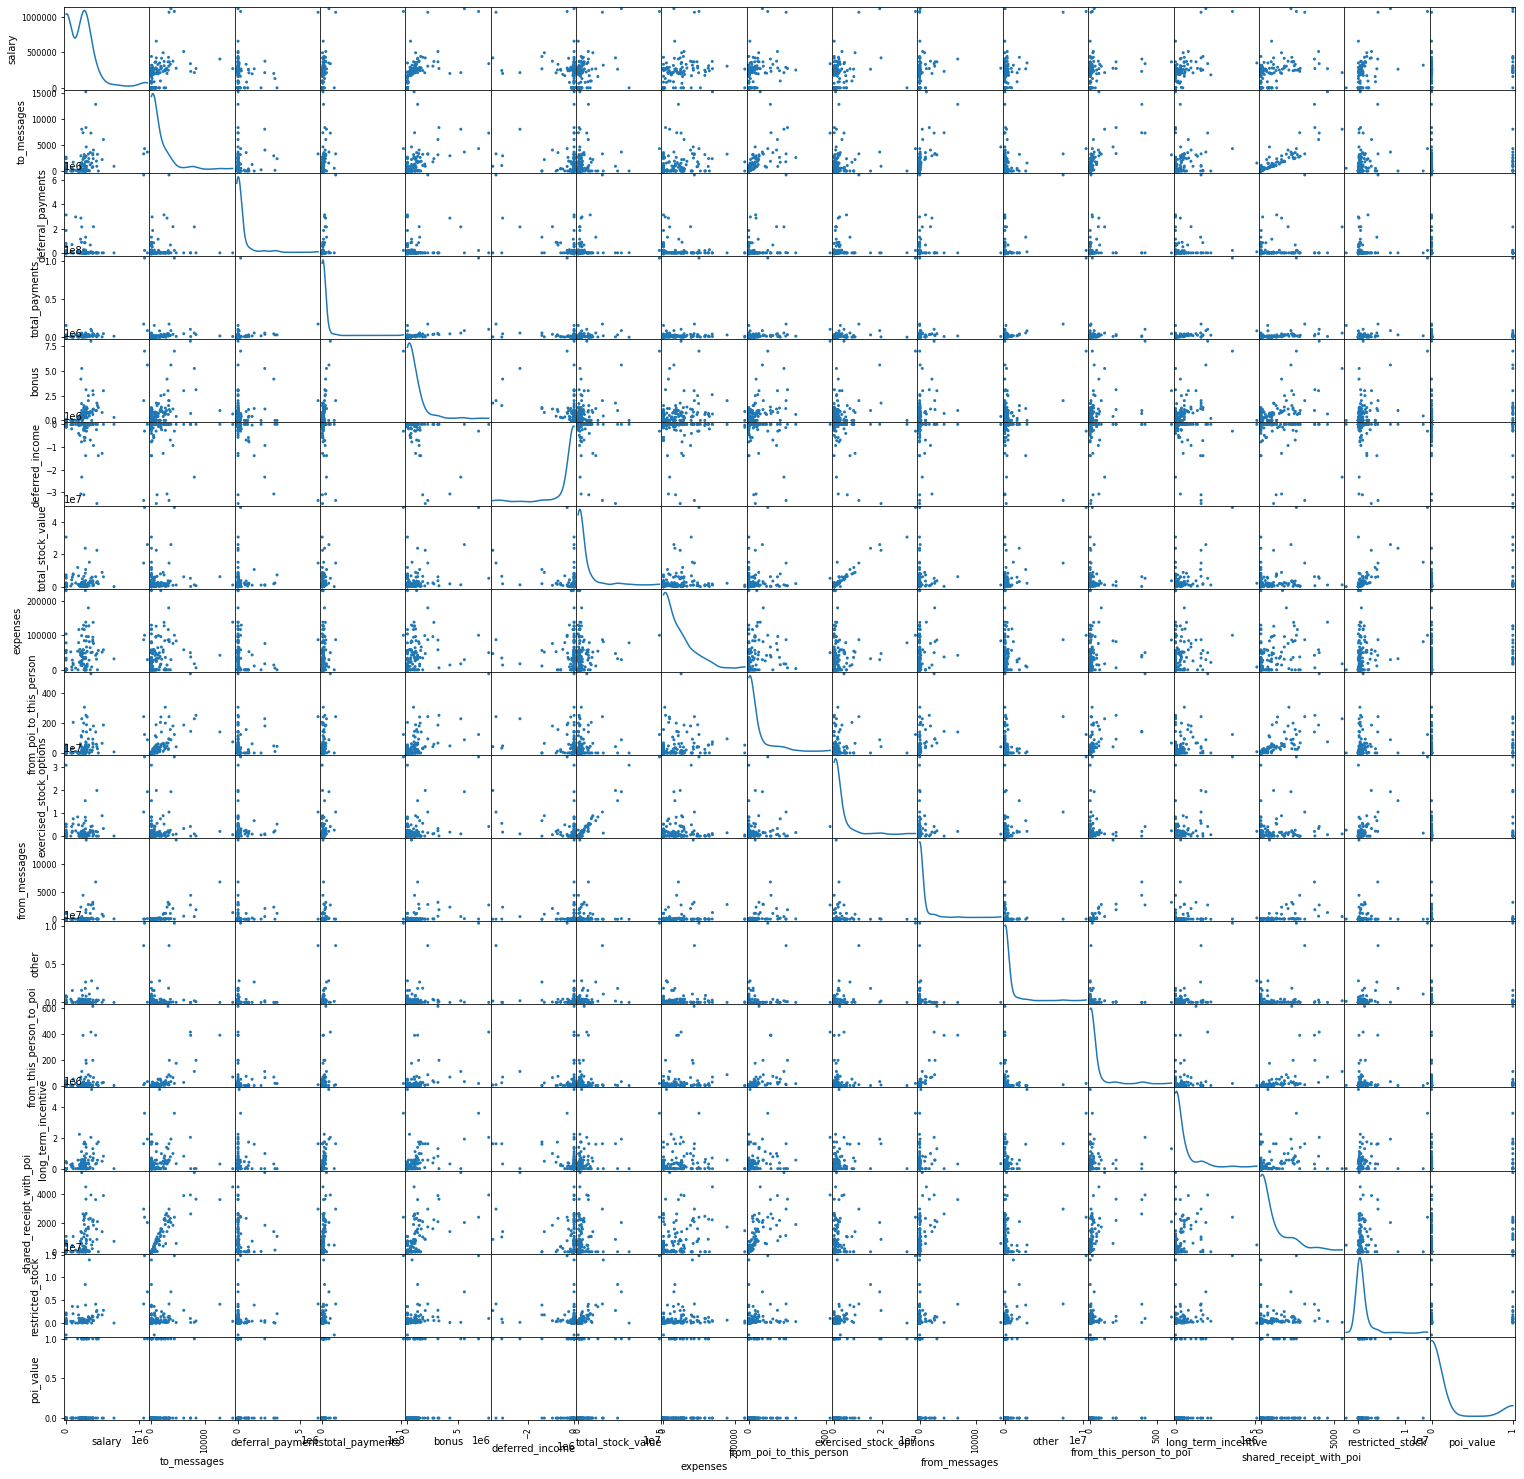

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha =1,figsize = (26,26),diagonal ='kde')

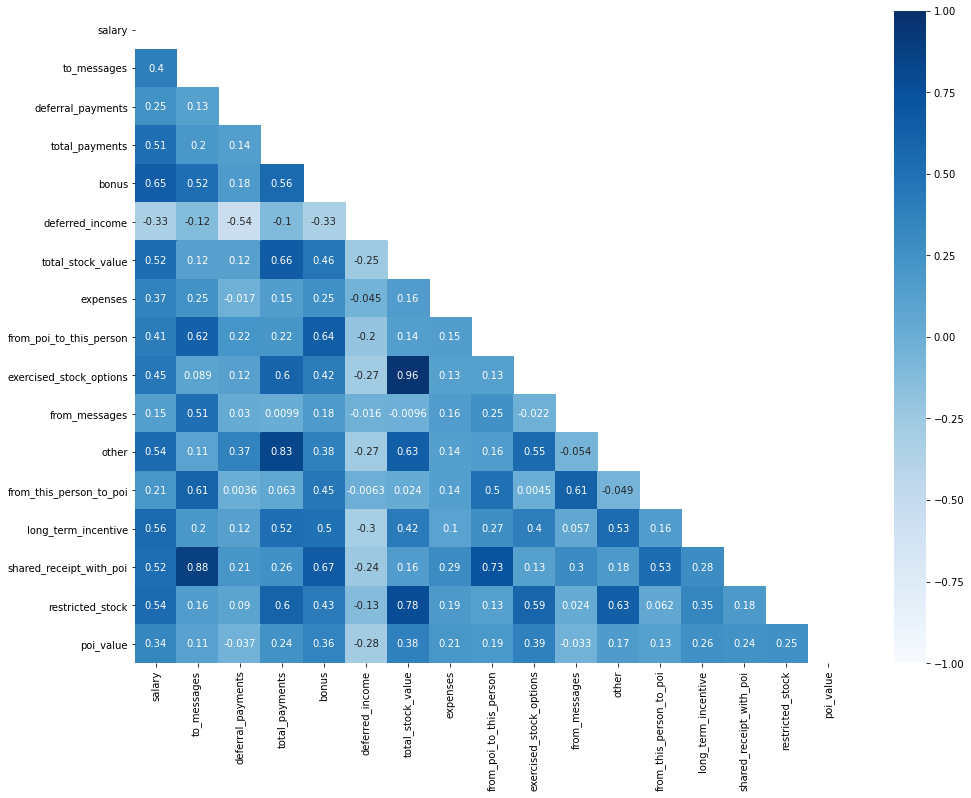

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = df
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot= True, cmap='Blues')
#'to_messages','loan_advances','exercised_stock_options','other','restricted_stock'

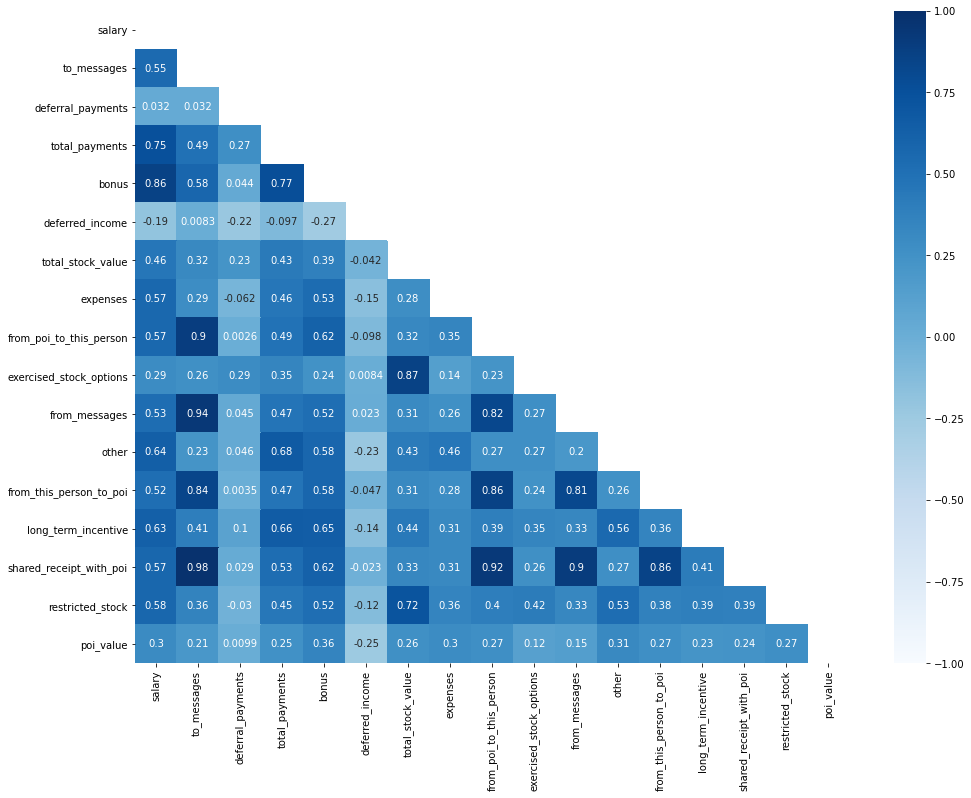

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = df
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(data.corr(method ='spearman'), dtype=np.bool))
heatmap = sns.heatmap(data.corr(method ='spearman'), mask=mask, vmin=-1, vmax=1, annot= True, cmap='Blues')
### Non linear corr

In [16]:
df.columns

Index(['salary', 'to_messages', 'deferral_payments', 'total_payments', 'bonus',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'poi_value'],
      dtype='object')

### dropping 'exercised_stock_options' OR 'total_stock_value', 'shared_receipt_with_poi' and 'from_messages'

In [17]:
df.drop(['from_poi_to_this_person','exercised_stock_options' ,'from_messages','shared_receipt_with_poi'],inplace = True, axis =1)

### plotiing side by side box plot to check which variable is predictive of a class

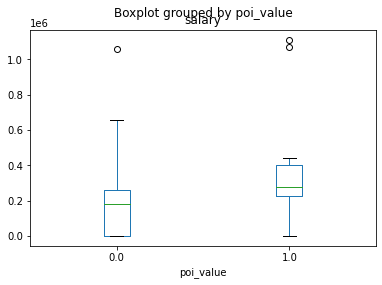

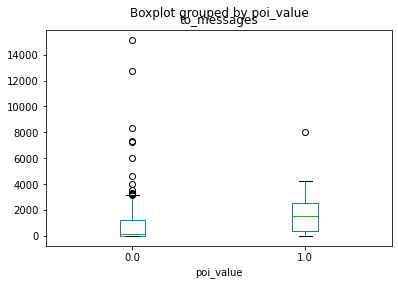

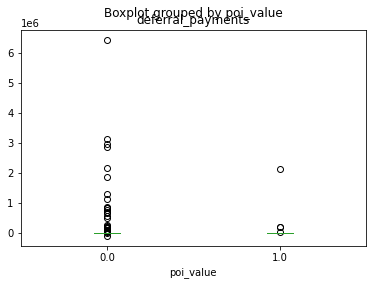

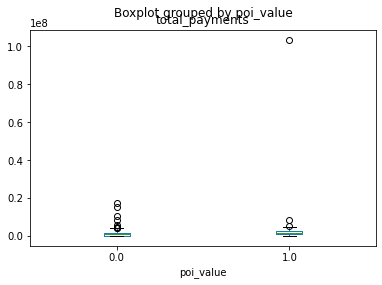

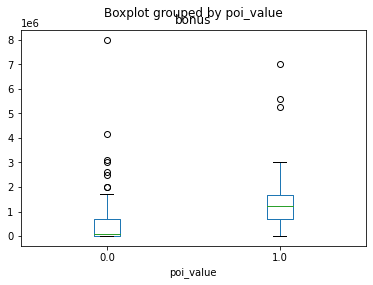

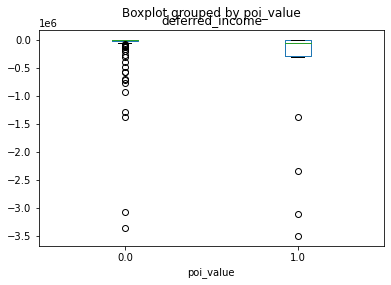

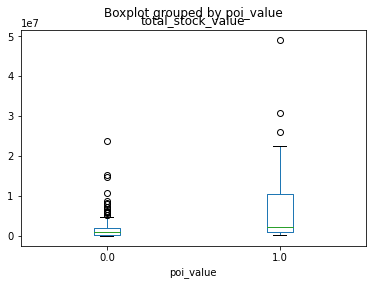

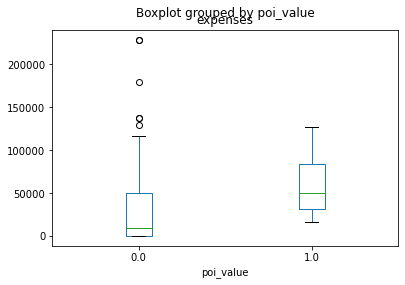

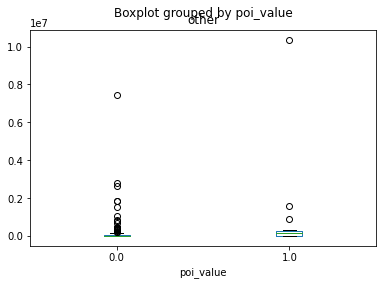

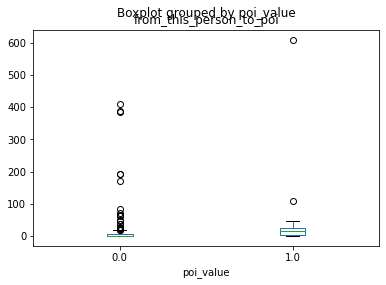

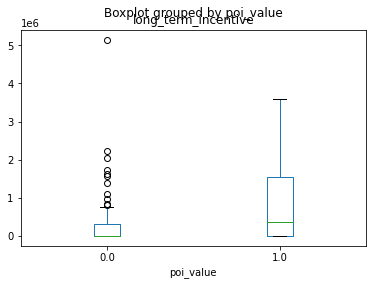

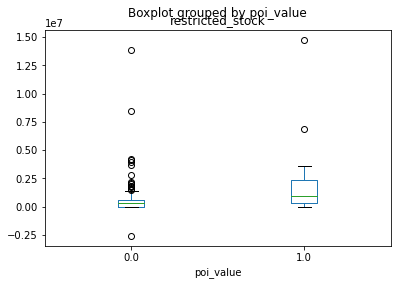

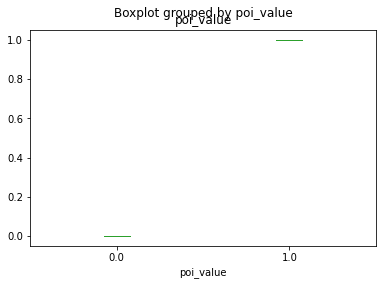

In [18]:
for col in df.columns:
    df.boxplot(by= 'poi_value',column =col,grid = False)
### all variables have different spread in both class type

In [19]:
df

,salary,to_messages,deferral_payments,total_payments,bonus,deferred_income,total_stock_value,expenses,other,from_this_person_to_poi,long_term_incentive,restricted_stock,poi_value
0,365788.0,807.0,0.0,1061827.0,600000.0,0.0,585062.0,94299.0,1740.0,1.0,0.0,585062.0,0.0
1,267102.0,0.0,1295738.0,5634343.0,1200000.0,-1386055.0,10623258.0,11200.0,2660303.0,0.0,1586055.0,3942714.0,0.0
2,170941.0,0.0,0.0,211725.0,350000.0,-400729.0,6678735.0,78552.0,12961.0,0.0,0.0,1788391.0,0.0
3,0.0,764.0,0.0,0.0,0.0,0.0,1038185.0,0.0,0.0,0.0,0.0,386335.0,0.0
4,243293.0,1045.0,0.0,288682.0,1500000.0,-3117011.0,6391065.0,34039.0,11350.0,21.0,1617011.0,853064.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.0,0.0,0.0,119292.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,415189.0,1892.0,0.0,1868758.0,1000000.0,-235000.0,2502063.0,30674.0,307895.0,12.0,350000.0,2502063.0,1.0
143,265214.0,533.0,227449.0,1092663.0,600000.0,0.0,3745048.0,0.0,0.0,0.0,0.0,563798.0,0.0
144,278601.0,865.0,0.0,875760.0,800000.0,-300000.0,1080988.0,96268.0,891.0,11.0,0.0,315068.0,0.0


In [20]:
data = df.values
# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]

# for i in range (0,146):
#     y[i] = str(y[i])
# print(X.shape, y.shape)

#split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train

(97, 12) (49, 12) (97,) (49,)


array([[3.099460e+05, 2.374000e+03, 0.000000e+00, ..., 1.500000e+01,
        3.000000e+05, 1.248318e+06],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.651630e+05, 3.093000e+03, 0.000000e+00, ..., 6.090000e+02,
        1.294981e+06, 1.323148e+06],
       ...,
       [3.045880e+05, 1.755000e+03, 0.000000e+00, ..., 3.700000e+01,
        3.743470e+05, 1.392142e+06],
       [3.305460e+05, 3.523000e+03, 6.495840e+05, ..., 7.100000e+01,
        7.698620e+05, 9.016570e+05],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 6.620860e+05]])

### Normalise Data

In [21]:
##Shift mean to zero and scale such that var= 1
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)               ##compute mean and var
## used mean and var to transform data
train_X = pd.DataFrame(scaler.transform(X_train))
train_y = pd.DataFrame(y_train)
display(train_X)
train_X.mean()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.620370,0.394168,-0.342348,-0.093514,0.026925,0.324635,-0.185644,2.208288,-0.137557,-0.159940,-0.066941,0.121159
1,-0.975987,-0.539162,-0.342348,-0.244171,-0.564492,0.324635,-0.453733,-0.814690,-0.269700,-0.331937,-0.464801,-0.407361
2,0.904761,0.676840,-0.342348,0.206444,1.970154,0.324635,0.050910,1.236233,-0.268241,6.651155,1.252602,0.152841
3,1.652610,1.827186,-0.342348,0.199762,1.970154,0.324635,0.395069,0.561842,-0.005318,-0.056741,0.607227,0.776501
4,-0.941917,-0.539162,-0.154894,-0.135345,-0.564492,0.324635,-0.453733,-0.814690,0.328254,-0.331937,0.020091,-0.407361
...,...,...,...,...,...,...,...,...,...,...,...,...
92,-0.975987,-0.539162,-0.241012,-0.239370,-0.564492,0.324635,-0.429106,-0.814690,-0.269700,-0.331937,-0.464801,-0.407361
93,-0.536789,-0.344161,-0.342348,-0.056294,-0.564492,0.324635,0.358884,-0.146083,1.094892,-0.274605,-0.050364,1.140033
94,0.592773,0.150810,-0.342348,0.104738,1.547713,0.324635,-0.128071,1.468281,0.082908,0.092323,0.031658,0.182052
95,0.726468,0.845893,0.958789,-0.020599,0.195902,-1.127333,0.027203,-0.814690,0.082110,0.482184,0.556190,-0.025612


0     1.373472e-17
1     1.373472e-17
2    -4.406555e-17
3     1.831296e-17
4     3.433679e-17
5     4.578239e-17
6    -5.722799e-19
7     7.325183e-17
8     2.804172e-17
9    -2.861400e-18
10    3.090312e-17
11   -1.430700e-18
dtype: float64

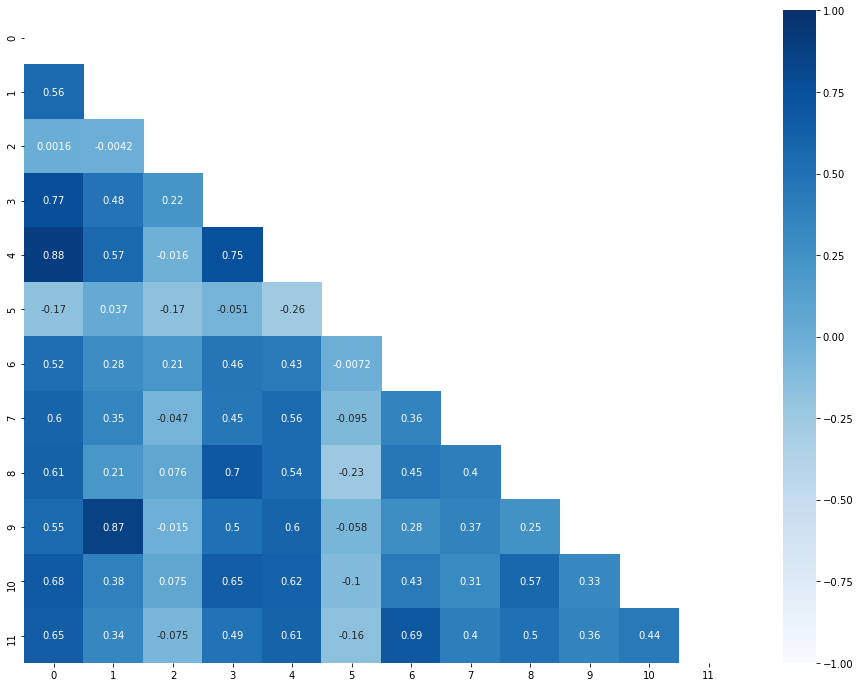

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = train_X
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(data.corr(method ='spearman'), dtype=np.bool))
heatmap = sns.heatmap(data.corr(method ='spearman'), mask=mask, vmin=-1, vmax=1, annot= True, cmap='Blues')
### Non linear corr

In [23]:
##Normalising Test data using same scaler
test_X = pd.DataFrame(scaler.transform(X_test))
test_y = pd.DataFrame(y_test) 
display(test_X)
test_X.mean()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.975987,-0.539162,0.788059,-0.190611,-0.564492,0.324635,-0.300837,-0.814690,-0.269700,-0.331937,-0.464801,-0.318954
1,0.718908,-0.073676,-0.186680,-0.118746,0.069169,0.324635,-0.089762,0.703522,-0.268846,-0.159940,-0.332181,0.003209
2,-0.975987,-0.539162,-0.342348,-0.235867,-0.564492,0.272395,-0.396084,-0.814690,-0.269700,-0.331937,-0.464801,-0.407361
3,0.458929,0.191304,-0.342348,0.009191,0.576099,0.322894,-0.418539,0.753883,-0.268276,-0.159940,0.827306,-0.300644
4,0.204925,0.322615,-0.342348,-0.167088,-0.226539,0.324635,-0.370312,0.555702,-0.269410,-0.309004,-0.299026,-0.323961
5,-0.975987,0.384732,5.930865,0.053064,-0.564492,0.324635,0.559479,-0.814690,-0.269700,-0.159940,-0.464801,0.458920
6,0.301408,-0.111418,-0.342348,-0.144079,-0.142051,0.324635,-0.312082,-0.800411,-0.268633,-0.331937,-0.060569,-0.327323
7,4.488274,0.748393,12.531112,1.393210,1.125272,-6.710996,1.587895,1.255582,6.253746,-0.263138,1.679678,1.366061
8,0.108179,-0.539162,1.410919,-0.129848,-0.205417,-1.295292,-0.170591,0.428968,-0.268729,-0.331937,0.086443,-0.273965
9,-0.975987,-0.516359,-0.342348,-0.244171,-0.564492,0.324635,-0.447128,-0.814690,-0.269700,-0.320471,-0.464801,-0.387333


0    -0.101138
1    -0.175493
2     0.287265
3    -0.097457
4    -0.003510
5    -0.222092
6    -0.157973
7     0.046786
8    -0.036357
9    -0.159238
10   -0.071657
11   -0.133105
dtype: float64

In [24]:
### using auto grid-search over range of hyperparameter to find the best values
##SVM
from  sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report as C_report
from sklearn.metrics import roc_auc_score
scoring ='f1'
from sklearn import svm
hyperparameters = {'kernel':('rbf','linear','poly'),'C':[0.1,1,10],'degree':[3,5,8]}

svc = svm.SVC()
model = clf = GridSearchCV(estimator= svc, param_grid= hyperparameters,scoring = scoring)
svc.get_params()['C']
clf.fit(np.array(train_X),np.squeeze(train_y))
print("Best Parameters are ")
print(clf.best_params_)
print("best ",scoring, ": ",clf.best_score_ )
print("Test Classifaction Result:")
y_real,y_pred = np.squeeze(test_y),clf.predict(np.array(test_X))
print(C_report(y_real,y_pred))
print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(np.array(train_X),np.squeeze(train_y))
print("training Score: ", score)
metrics.f1_score(y_real, y_pred)

Best Parameters are 
{'C': 10, 'degree': 3, 'kernel': 'linear'}
best  f1 :  0.3
Test Classifaction Result:
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        44
         1.0       0.17      0.20      0.18         5

    accuracy                           0.82        49
   macro avg       0.54      0.54      0.54        49
weighted avg       0.83      0.82      0.82        49

test auc-roc:  0.5431818181818181
training Score:  0.7000000000000001


0.1818181818181818

In [25]:
### RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state =1)
hyperparameters = {'max_depth':[2,5,10,20],'n_estimators':[10,30,100]}
model = clf = GridSearchCV(rfc, param_grid= hyperparameters,scoring = scoring)
clf.fit(np.array(train_X),np.squeeze(train_y))
print("Best Parameters are ")
print(clf.best_params_)
print("best ",scoring, ": ",clf.best_score_ )
print("Test Classifaction Result:")
y_real,y_pred = np.squeeze(test_y),clf.predict(np.array(test_X))
print(C_report(y_real,y_pred))
print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(np.array(train_X),np.squeeze(train_y))
print("training Score: ", score)

Best Parameters are 
{'max_depth': 2, 'n_estimators': 100}
best  f1 :  0.31333333333333335
Test Classifaction Result:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93        44
         1.0       0.00      0.00      0.00         5

    accuracy                           0.88        49
   macro avg       0.45      0.49      0.47        49
weighted avg       0.80      0.88      0.84        49

test auc-roc:  0.48863636363636365
training Score:  0.47058823529411764


In [26]:

##RandomForest
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train = np.array(train_X)
X_test = np.array(test_X)
y_train = np.squeeze(train_y)
y_test = np.squeeze(test_y)
#fit the model
model = RandomForestClassifier(random_state=1)

model.fit(X_train, y_train)
#make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
y_real,y_pred = np.squeeze(y_test),yhat
print(C_report(y_real,y_pred))

print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(X_train, y_train)
print("training Score: ", score)

Accuracy: 0.857
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        44
         1.0       0.25      0.20      0.22         5

    accuracy                           0.86        49
   macro avg       0.58      0.57      0.57        49
weighted avg       0.84      0.86      0.85        49

test auc-roc:  0.5659090909090909
training Score:  1.0


In [27]:
### GNB
from sklearn.naive_bayes import GaussianNB

import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train = np.array(train_X)
X_test = np.array(test_X)
y_train = np.squeeze(train_y)
y_test = np.squeeze(test_y)
#fit the model
model =  GaussianNB()

model.fit(X_train, y_train)
#make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
y_real,y_pred = np.squeeze(y_test),yhat
print(C_report(y_real,y_pred))

print('test auc-roc: ',roc_auc_score(y_real,y_pred))


score = model.score(X_train, y_train)
print("training Score: ", score)

Accuracy: 0.837
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        44
         1.0       0.20      0.20      0.20         5

    accuracy                           0.84        49
   macro avg       0.55      0.55      0.55        49
weighted avg       0.84      0.84      0.84        49

test auc-roc:  0.5545454545454545
training Score:  0.8556701030927835


In [28]:
### SVM
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn import svm
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train = np.array(train_X)
X_test = np.array(test_X)
y_train = np.squeeze(train_y)
y_test = np.squeeze(test_y)

#fit the model
model = svc = svm.SVC()

model.fit(X_train, y_train)
#make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
y_real,y_pred = np.squeeze(y_test),yhat
print(C_report(y_real,y_pred))

print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(X_train, y_train)
print("training Score: ", score)

cm = confusion_matrix(y_real, y_pred)
print(cm)
for i in range(0,49):
    print(y_test[i],yhat[i])

Accuracy: 0.898
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        44
         1.0       0.50      0.20      0.29         5

    accuracy                           0.90        49
   macro avg       0.71      0.59      0.62        49
weighted avg       0.87      0.90      0.88        49

test auc-roc:  0.5886363636363636
training Score:  0.9278350515463918
[[43  1]
 [ 4  1]]
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


In [29]:
### DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn import svm
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train = np.array(train_X)
X_test = np.array(test_X)
y_train = np.squeeze(train_y)
y_test = np.squeeze(test_y)
#fit the model
model = DecisionTreeClassifier(random_state=1)

model.fit(X_train, y_train)
#make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
y_real,y_pred = np.squeeze(y_test),yhat
print(C_report(y_real,y_pred))
# for i in range(0,49):
#     print(y_test[i],yhat[i])
print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(X_train, y_train)
print("training Score: ", score)

cm = confusion_matrix(y_real, y_pred)
print(cm)

Accuracy: 0.735
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.84        44
         1.0       0.10      0.20      0.13         5

    accuracy                           0.73        49
   macro avg       0.50      0.50      0.49        49
weighted avg       0.82      0.73      0.77        49

test auc-roc:  0.4977272727272727
training Score:  1.0
[[35  9]
 [ 4  1]]


In [30]:
from sklearn.linear_model import LogisticRegression
### LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn import svm
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train = np.array(train_X)
X_test = np.array(test_X)
y_train = np.squeeze(train_y)
y_test = np.squeeze(test_y)

#fit the model
model = LogisticRegression(random_state=1)

model.fit(X_train, y_train)
#make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
y_real,y_pred = np.squeeze(y_test),yhat
print(C_report(y_real,y_pred))
# for i in range(0,49):
#     print(y_test[i],yhat[i])
print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(X_train, y_train)
print("training Score: ", score)
cm = confusion_matrix(y_real, y_pred)
print(cm)

Accuracy: 0.837
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        44
         1.0       0.20      0.20      0.20         5

    accuracy                           0.84        49
   macro avg       0.55      0.55      0.55        49
weighted avg       0.84      0.84      0.84        49

test auc-roc:  0.5545454545454545
training Score:  0.9381443298969072
[[40  4]
 [ 4  1]]


In [31]:
## LinearSVM
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn import svm
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train = np.array(train_X)
X_test = np.array(test_X)
y_train = np.squeeze(train_y)
y_test = np.squeeze(test_y)

#fit the model
model  = LinearSVC()

model.fit(X_train, y_train)
#make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
y_real,y_pred = np.squeeze(y_test),yhat
print(C_report(y_real,y_pred))
# for i in range(0,49):
#     print(y_test[i],yhat[i])
print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(X_train, y_train)
print("Score: ", score)

cm = confusion_matrix(y_real, y_pred)
print(cm)

Accuracy: 0.816
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        44
         1.0       0.17      0.20      0.18         5

    accuracy                           0.82        49
   macro avg       0.54      0.54      0.54        49
weighted avg       0.83      0.82      0.82        49

test auc-roc:  0.5431818181818181
Score:  0.9381443298969072
[[39  5]
 [ 4  1]]


In [32]:
from sklearn.ensemble import AdaBoostClassifier
## adaBoost 
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn import svm
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train = np.array(train_X)
X_test = np.array(test_X)
y_train = np.squeeze(train_y)
y_test = np.squeeze(test_y)

#fit the model
model  = AdaBoostClassifier(n_estimators=20, random_state=7)

model.fit(X_train, y_train)
#make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
y_real,y_pred = np.squeeze(y_test),yhat
print(C_report(y_real,y_pred))
# for i in range(0,49):
#     print(y_test[i],yhat[i])
print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(X_train, y_train)
print("Score: ", score)

cm = confusion_matrix(y_real, y_pred)
print(cm)

for i in range(0,49):
    print(y_test[i],yhat[i])

Accuracy: 0.857
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        44
         1.0       0.33      0.40      0.36         5

    accuracy                           0.86        49
   macro avg       0.63      0.65      0.64        49
weighted avg       0.87      0.86      0.86        49

test auc-roc:  0.6545454545454545
Score:  1.0
[[40  4]
 [ 3  2]]
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


In [33]:
# Bagged Decision Trees for Classification
import pandas 
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

X =  np.array(train_X)
Y =  np.squeeze(train_y)
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 12
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X, Y)
#make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
y_real,y_pred = np.squeeze(y_test),yhat
print(C_report(y_real,y_pred))
# for i in range(0,49):
#     print(y_test[i],yhat[i])
print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(X_train, y_train)
print("Score: ", score)

cm = confusion_matrix(y_real, y_pred)
print(cm)


0.8877777777777778
Accuracy: 0.898
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        44
         1.0       0.50      0.20      0.29         5

    accuracy                           0.90        49
   macro avg       0.71      0.59      0.62        49
weighted avg       0.87      0.90      0.88        49

test auc-roc:  0.5886363636363636
Score:  0.9896907216494846
[[43  1]
 [ 4  1]]


In [34]:
# Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

X =  np.array(train_X)
Y =  np.squeeze(train_y)
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X, Y)
#make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
y_real,y_pred = np.squeeze(y_test),yhat
print(C_report(y_real,y_pred))
# for i in range(0,49):
#     print(y_test[i],yhat[i])
print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(X_train, y_train)
print("Score: ", score)

cm = confusion_matrix(y_real, y_pred)
print(cm)


0.8877777777777778
Accuracy: 0.837
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        44
         1.0       0.20      0.20      0.20         5

    accuracy                           0.84        49
   macro avg       0.55      0.55      0.55        49
weighted avg       0.84      0.84      0.84        49

test auc-roc:  0.5545454545454545
Score:  1.0
[[40  4]
 [ 4  1]]


In [35]:
# Extra Trees Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier

X =  np.array(train_X)
Y =  np.squeeze(train_y)
seed = 7
num_trees = 50
max_features = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X, Y)
#make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
y_real,y_pred = np.squeeze(y_test),yhat
print(C_report(y_real,y_pred))
# for i in range(0,49):
#     print(y_test[i],yhat[i])
print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(X_train, y_train)
print("Score: ", score)

cm = confusion_matrix(y_real, y_pred)
print(cm)


0.8866666666666667
Accuracy: 0.837
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        44
         1.0       0.20      0.20      0.20         5

    accuracy                           0.84        49
   macro avg       0.55      0.55      0.55        49
weighted avg       0.84      0.84      0.84        49

test auc-roc:  0.5545454545454545
Score:  1.0
[[40  4]
 [ 4  1]]


In [36]:
# Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

X =  np.array(train_X)
Y =  np.squeeze(train_y)
seed = 6
num_trees = 106
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)

print("Cross_validation_score =",results.mean())

model.fit(X, Y)
#make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)

y_real,y_pred = np.squeeze(y_test),yhat
print(C_report(y_real,y_pred))
# for i in range(0,49):
#     print(y_test[i],yhat[i])
print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(X_train, y_train)
print("Training Score: ", score)
print('Test Accuracy: %.3f' % acc)
cm = confusion_matrix(y_real, y_pred)
print(cm)

for i in range(0,49):
    print(y_test[i],yhat[i])
metrics.f1_score(y_real, y_pred)

Cross_validation_score = 0.8566666666666667
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        44
         1.0       0.50      0.40      0.44         5

    accuracy                           0.90        49
   macro avg       0.72      0.68      0.69        49
weighted avg       0.89      0.90      0.89        49

test auc-roc:  0.6772727272727272
Training Score:  1.0
Test Accuracy: 0.898
[[42  2]
 [ 3  2]]
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


0.4444444444444445

In [37]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

X =  np.array(train_X)
Y =  np.squeeze(train_y)
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
model = ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

model.fit(X, Y)
#make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
y_real,y_pred = np.squeeze(y_test),yhat
print(C_report(y_real,y_pred))
# for i in range(0,49):
#     print(y_test[i],yhat[i])
print('test auc-roc: ',roc_auc_score(y_real,y_pred))

score = model.score(X_train, y_train)
print("training_Score: ", score)

cm = confusion_matrix(y_real, y_pred)
print(cm)

# for i in range(0,49):
#     print(y_test[i],yhat[i])
#metrics.f1_score(y_real, y_pred)

0.8877777777777777
Accuracy: 0.837
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        44
         1.0       0.20      0.20      0.20         5

    accuracy                           0.84        49
   macro avg       0.55      0.55      0.55        49
weighted avg       0.84      0.84      0.84        49

test auc-roc:  0.5545454545454545
training_Score:  0.9381443298969072
[[40  4]
 [ 4  1]]
